In [1]:
import sys
import geopandas as gpd
import fiona
from shapely.geometry import Polygon
from shapely.ops import transform
import math
import pyproj
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [7]:
fiona.listlayers(r'd:\UTCloud\DGGS\grids\grids.gpkg')

['DGGRID_ISEA4H_7',
 'DGGRID_ISEA3H_9',
 'rhpix_5',
 'DGGRID_ISEA7H_5',
 'rhpix_5_anomalies',
 'DGGRID_ISEA7H_5_anomalies',
 'DGGRID_ISEA3H_9_clean',
 'DGGRID_ISEA4D_7',
 'H3_4',
 'EAGGR4T_7',
 'DGGRID_FULLER_7H',
 's2_8',
 'DGGRID_ISEA7H_5_clean',
 'DGGRID_FULLER_7H_clean',
 'rhpix_5_clean',
 's2_8_clean',
 'DGGRID_FULLER_4T',
 'DGGRID_ISEA4T_7',
 'DGGRID_FULLER_4T_clean',
 'DGGRID_ISEA4T_7_clean',
 'DGGRID_ISEA4D_7_clean',
 'DGGRID_FULLER_4D_clean',
 'DGGRID_FULLER_4D']

In [7]:
def zsc_calculation(df):
    zsc = math.sqrt(4*math.pi*df['ind_lambert_area'] - math.pow(df['ind_lambert_area'],2)/math.pow(6378137,2))/df['lambert_perimeter']
    return zsc

In [24]:
world_countries = gpd.read_file(r'd:\UT\GISData\NaturalEarth\ne_110m_admin_0_countries\ne_110m_admin_0_countries.shp')

## Compactness calculations

### H3

In [21]:
grid = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids.gpkg', layer='H3_4', driver='GPKG').dropna()

In [23]:
grid['zsc'] = grid.apply(zsc_calculation,axis=1)

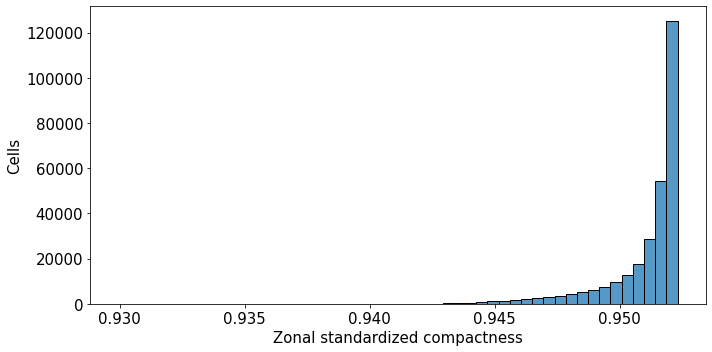

In [22]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(grid,x="zsc", ax=ax, bins=50)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel('Zonal standardized compactness', fontsize=15)
ax.set_ylabel('Cells', fontsize=15)
plt.tight_layout()
plt.savefig(r'd:\UTCloud\DGGS\results\area_statistics\h3_compactness.png', bbox_inches="tight",dpi=300)

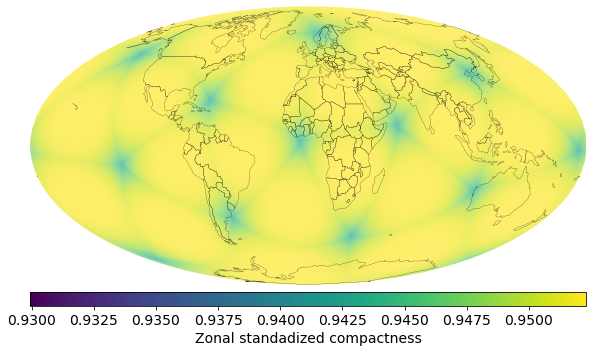

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
grid.to_crs('proj=moll').plot(column='zsc', ax=ax, legend=True,cax=cax, legend_kwds={'label': "zonal standadized compactness",'orientation': "horizontal"})
world_countries.boundary.to_crs('proj=moll').plot(color=None, edgecolor='black',linewidth = 0.2,ax=ax)
ax.axis('off')
ax.margins(0)
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=14)
cb_ax.set_xlabel(xlabel= "Zonal standadized compactness",fontsize=14)
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
plt.tight_layout()
plt.savefig(r'd:\UTCloud\DGGS\results\area_statistics\h3_compactness_map.png', bbox_inches="tight",dpi=300)

In [26]:
grid.to_file(r'd:\UTCloud\DGGS\grids\grids.gpkg', layer='H3_4', driver='GPKG')

### ISEA7H

In [27]:
grid = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids.gpkg', layer='DGGRID_ISEA7H_5_clean', driver='GPKG').dropna()

In [23]:
len(grid)

167636

In [8]:
grid['zsc'] = grid.apply(zsc_calculation,axis=1)

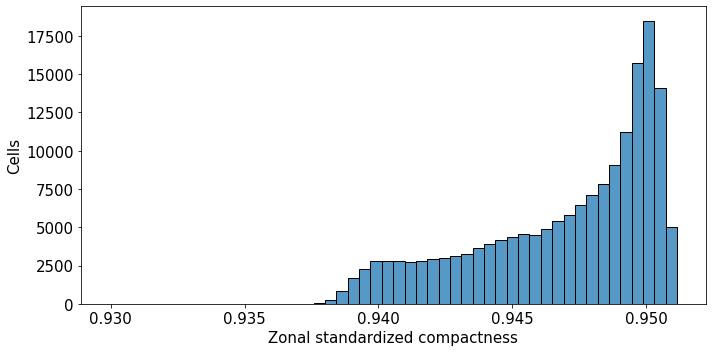

In [28]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(grid,x="zsc", ax=ax, bins=50)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel('Zonal standardized compactness', fontsize=15)
ax.set_ylabel('Cells', fontsize=15)
plt.tight_layout()
plt.savefig(r'd:\UTCloud\DGGS\results\area_statistics\iseaH_compactness.png', bbox_inches="tight",dpi=300)

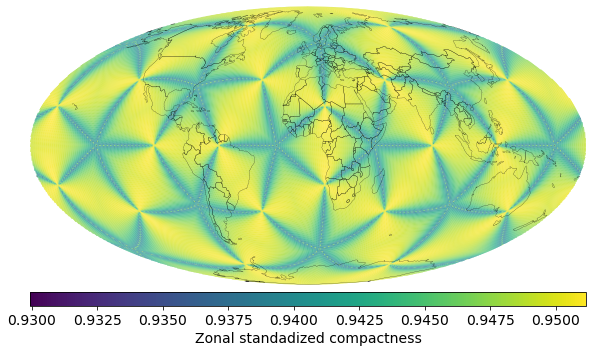

In [29]:
fig, ax = plt.subplots(figsize=(10,5))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
grid.to_crs('proj=moll').plot(column='zsc', ax=ax, legend=True,cax=cax, legend_kwds={'label': "zonal standadized compactness",'orientation': "horizontal"})
world_countries.boundary.to_crs('proj=moll').plot(color=None, edgecolor='black',linewidth = 0.2,ax=ax)
ax.axis('off')
ax.margins(0)
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=14)
cb_ax.set_xlabel(xlabel= "Zonal standadized compactness",fontsize=14)
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
plt.tight_layout()
plt.savefig(r'd:\UTCloud\DGGS\results\area_statistics\iseaH_compactness_map.png', bbox_inches="tight",dpi=300)

In [34]:
grid.to_file(r'd:\UTCloud\DGGS\grids\grids.gpkg', layer='DGGRID_ISEA7H_5_clean', driver='GPKG')

### FULLER7H

In [31]:
grid = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids.gpkg', layer='DGGRID_FULLER_7H_clean', driver='GPKG').dropna()

In [25]:
len(grid)

167635

In [26]:
grid['zsc'] = grid.apply(zsc_calculation,axis=1)

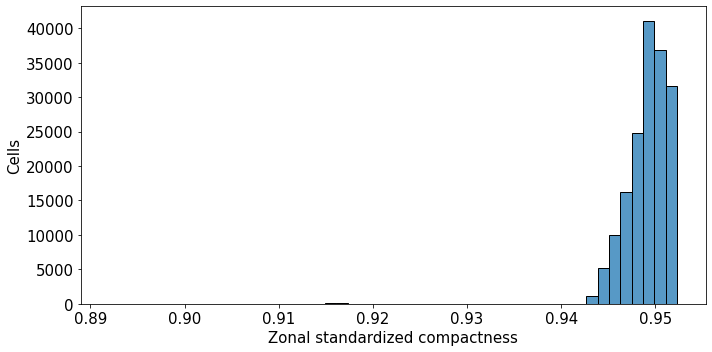

In [32]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(grid,x="zsc", ax=ax, bins=50)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel('Zonal standardized compactness', fontsize=15)
ax.set_ylabel('Cells', fontsize=15)
plt.tight_layout()
plt.savefig(r'd:\UTCloud\DGGS\results\area_statistics\FullerH_compactness.png', bbox_inches="tight",dpi=300)

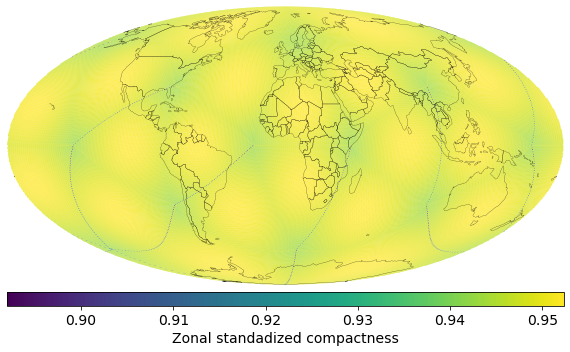

In [33]:
fig, ax = plt.subplots(figsize=(10,5))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
grid.to_crs('proj=moll').plot(column='zsc', ax=ax, legend=True,cax=cax, legend_kwds={'label': "zonal standadized compactness",'orientation': "horizontal"})
world_countries.boundary.to_crs('proj=moll').plot(color=None, edgecolor='black',linewidth = 0.2,ax=ax)
ax.axis('off')
ax.margins(0)
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=14)
cb_ax.set_xlabel(xlabel= "Zonal standadized compactness",fontsize=14)
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
plt.tight_layout()
plt.savefig(r'd:\UTCloud\DGGS\results\area_statistics\Fuller7H_compactness_map.png', bbox_inches="tight",dpi=300)

In [40]:
grid.to_file(r'd:\UTCloud\DGGS\grids\grids.gpkg', layer='DGGRID_FULLER_7H_clean', driver='GPKG')

### rHEALPIx

In [34]:
grid = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids.gpkg', layer='rhpix_5_clean', driver='GPKG').dropna()

In [16]:
grid['zsc'] = grid.apply(zsc_calculation,axis=1)

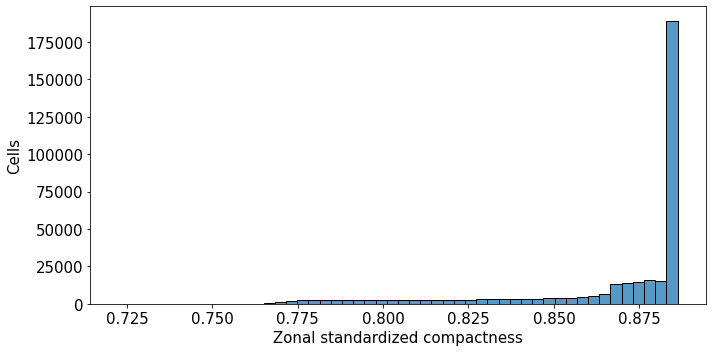

In [35]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(grid,x="zsc", ax=ax, bins=50)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel('Zonal standardized compactness', fontsize=15)
ax.set_ylabel('Cells', fontsize=15)
plt.tight_layout()
plt.savefig(r'd:\UTCloud\DGGS\results\area_statistics\rhpix_compactness.png', bbox_inches="tight",dpi=300)

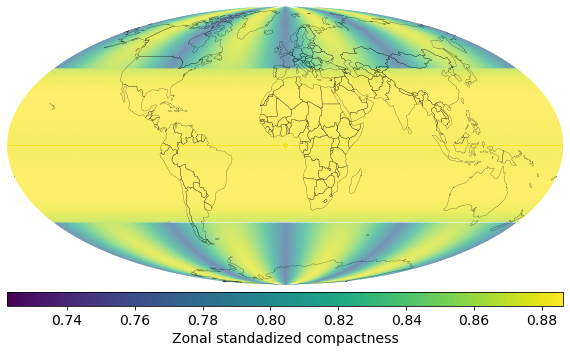

In [36]:
fig, ax = plt.subplots(figsize=(10,5))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
grid.to_crs('proj=moll').plot(column='zsc', ax=ax, legend=True,cax=cax, legend_kwds={'label': "zonal standadized compactness",'orientation': "horizontal"})
world_countries.boundary.to_crs('proj=moll').plot(color=None, edgecolor='black',linewidth = 0.2,ax=ax)
ax.axis('off')
ax.margins(0)
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=14)
cb_ax.set_xlabel(xlabel= "Zonal standadized compactness",fontsize=14)
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
plt.tight_layout()
plt.savefig(r'd:\UTCloud\DGGS\results\area_statistics\rhpix_compactness_map.png', bbox_inches="tight",dpi=300)

In [47]:
grid.to_file(r'd:\UTCloud\DGGS\grids\grids.gpkg', layer='rhpix_5_clean', driver='GPKG')

### S2

In [37]:
grid = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids.gpkg', layer='s2_8_clean', driver='GPKG').dropna()

In [20]:
grid['zsc'] = grid.apply(zsc_calculation,axis=1)

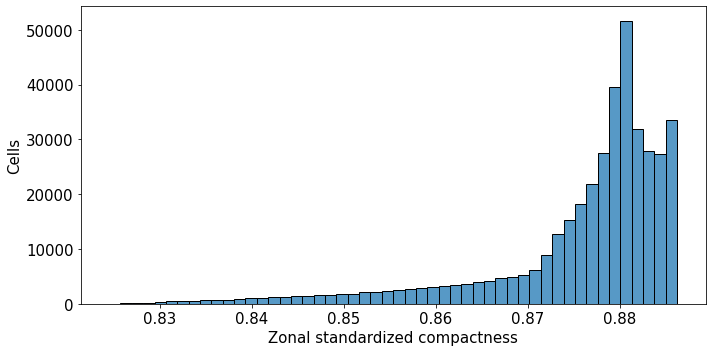

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(grid,x="zsc", ax=ax, bins=50)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel('Zonal standardized compactness', fontsize=15)
ax.set_ylabel('Cells', fontsize=15)
plt.tight_layout()
plt.savefig(r'd:\UTCloud\DGGS\results\area_statistics\s2_compactness.png', bbox_inches="tight",dpi=300)

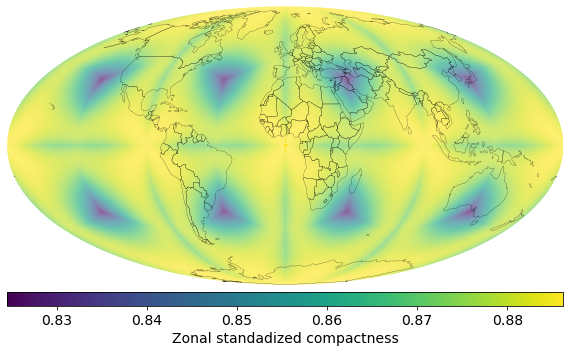

In [39]:
fig, ax = plt.subplots(figsize=(10,5))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
grid.to_crs('proj=moll').plot(column='zsc', ax=ax, legend=True,cax=cax, legend_kwds={'label': "zonal standadized compactness",'orientation': "horizontal"})
world_countries.boundary.to_crs('proj=moll').plot(color=None, edgecolor='black',linewidth = 0.2,ax=ax)
ax.axis('off')
ax.margins(0)
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=14)
cb_ax.set_xlabel(xlabel= "Zonal standadized compactness",fontsize=14)
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
plt.tight_layout()
plt.savefig(r'd:\UTCloud\DGGS\results\area_statistics\s2_compactness_map.png', bbox_inches="tight",dpi=300)

In [52]:
grid.to_file(r'd:\UTCloud\DGGS\grids\grids.gpkg', layer='s2_8_clean', driver='GPKG')

### ISEA_4T

In [40]:
grid = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids.gpkg', layer='EAGGR4T_7_clean', driver='GPKG').dropna()

In [51]:
grid['zsc'] = grid.apply(zsc_calculation,axis=1)

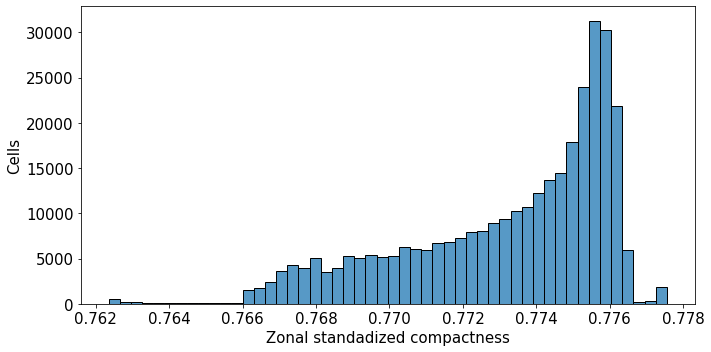

In [41]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(grid,x="zsc", ax=ax, bins=50)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel('Zonal standadized compactness', fontsize=15)
ax.set_ylabel('Cells', fontsize=15)
plt.tight_layout()
plt.savefig(r'd:\UTCloud\DGGS\results\area_statistics\ISEA4T_compactness.png', bbox_inches="tight",dpi=300)

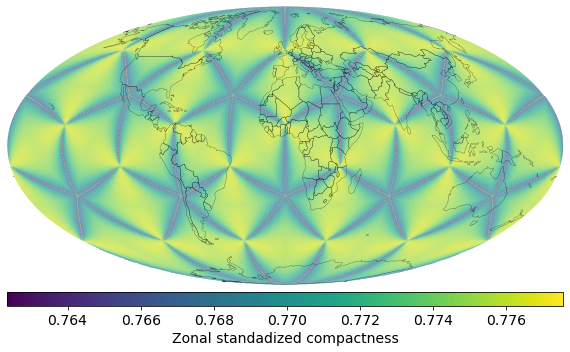

In [42]:
fig, ax = plt.subplots(figsize=(10,5))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
grid.to_crs('proj=moll').plot(column='zsc', ax=ax, legend=True,cax=cax, legend_kwds={'label': "zonal standadized compactness",'orientation': "horizontal"})
world_countries.boundary.to_crs('proj=moll').plot(color=None, edgecolor='black',linewidth = 0.2,ax=ax)
ax.axis('off')
ax.margins(0)
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=14)
cb_ax.set_xlabel(xlabel= "Zonal standadized compactness",fontsize=14)
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
plt.tight_layout()
plt.savefig(r'd:\UTCloud\DGGS\results\area_statistics\ISEA4T_compactness_map.png', bbox_inches="tight",dpi=300)

In [49]:
grid.to_file(r'd:\UTCloud\DGGS\grids\grids.gpkg', layer='EAGGR4T_7_clean', driver='GPKG')

### FULLER_4T

In [14]:
grid = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids.gpkg', layer='DGGRID_FULLER_4T_clean', driver='GPKG').dropna()

In [16]:
grid['zsc'] = grid.apply(zsc_calculation,axis=1)

NameError: name 'zsc_calculation' is not defined

ValueError: Could not interpret value `zsc` for parameter `x`

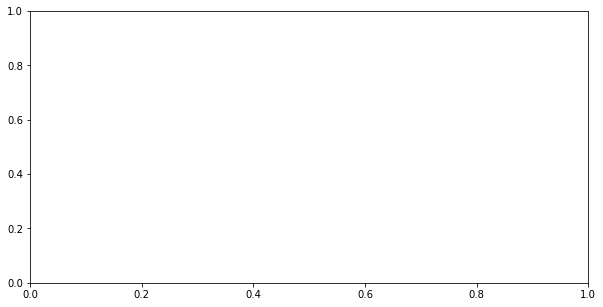

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(grid,x="zsc", ax=ax, bins=50)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel('Zonal standadized compactness', fontsize=12)
ax.set_ylabel('cells', fontsize=12)
plt.tight_layout()
plt.savefig(r'd:\UTCloud\DGGS\results\area_statistics\ISEA4T_compactness.png', bbox_inches="tight",dpi=300)

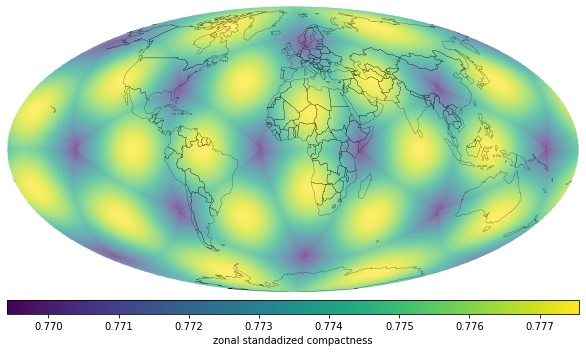

In [45]:
fig, ax = plt.subplots(figsize=(10,5))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
grid.to_crs('proj=moll').plot(column='zsc', ax=ax, legend=True,cax=cax, legend_kwds={'label': "zonal standadized compactness",'orientation': "horizontal"})
world_countries.boundary.to_crs('proj=moll').plot(color=None, edgecolor='black',linewidth = 0.2,ax=ax)
ax.axis('off')
ax.margins(0)
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
plt.tight_layout()
plt.savefig(r'd:\UTCloud\DGGS\results\area_statistics\ISEA4T_compactness_map.png', bbox_inches="tight",dpi=300)

In [ ]:
grid.to_file(r'd:\UTCloud\DGGS\grids\grids.gpkg', layer='DGGRID_FULLER_4T_clean', driver='GPKG')

### ISEA_4D

In [43]:
grid = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids.gpkg', layer='DGGRID_ISEA4D_7_clean', driver='GPKG').dropna()

In [19]:
grid['zsc'] = grid.apply(zsc_calculation,axis=1)

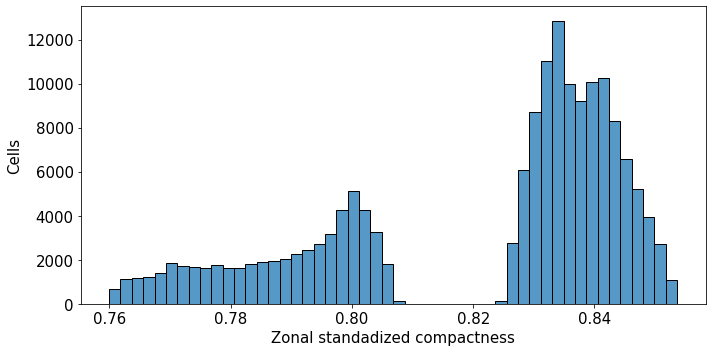

In [44]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(grid,x="zsc", ax=ax, bins=50)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel('Zonal standadized compactness', fontsize=15)
ax.set_ylabel('Cells', fontsize=15)
plt.tight_layout()
plt.savefig(r'd:\UTCloud\DGGS\results\area_statistics\ISEA4TD_compactness.png', bbox_inches="tight",dpi=300)

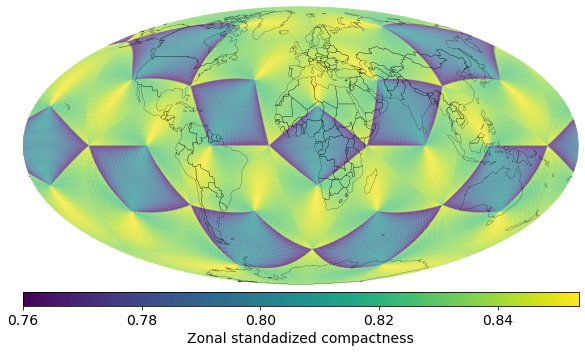

In [45]:
fig, ax = plt.subplots(figsize=(10,5))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
grid.to_crs('proj=moll').plot(column='zsc', ax=ax, legend=True,cax=cax, legend_kwds={'label': "zonal standadized compactness",'orientation': "horizontal"})
world_countries.boundary.to_crs('proj=moll').plot(color=None, edgecolor='black',linewidth = 0.2,ax=ax)
ax.axis('off')
ax.margins(0)
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=14)
cb_ax.set_xlabel(xlabel= "Zonal standadized compactness",fontsize=14)
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
plt.tight_layout()
plt.savefig(r'd:\UTCloud\DGGS\results\area_statistics\ISEA4D_compactness_map.png', bbox_inches="tight",dpi=300)

In [35]:
grid.to_file(r'd:\UTCloud\DGGS\grids\grids.gpkg', layer='DGGRID_ISEA4D_7_clean', driver='GPKG')

### FULLER_4D

In [46]:
grid = gpd.read_file(r'd:\UTCloud\DGGS\grids\grids.gpkg', layer='DGGRID_FULLER_4D_clean').dropna()

In [38]:
grid['zsc'] = grid.apply(zsc_calculation,axis=1)

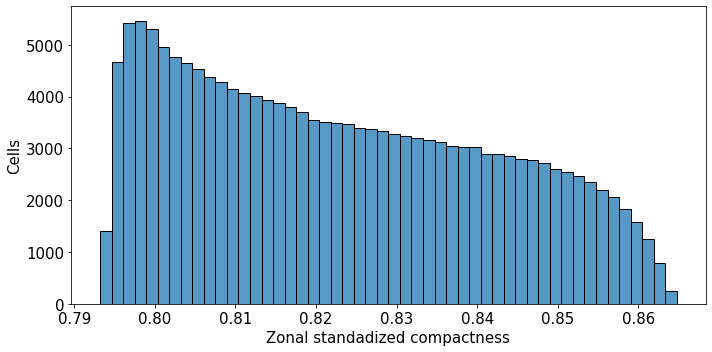

In [47]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(grid,x="zsc", ax=ax, bins=50)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel('Zonal standadized compactness', fontsize=15)
ax.set_ylabel('Cells', fontsize=15)
plt.tight_layout()
plt.savefig(r'd:\UTCloud\DGGS\results\area_statistics\Fuller4D_compactness.png', bbox_inches="tight",dpi=300)

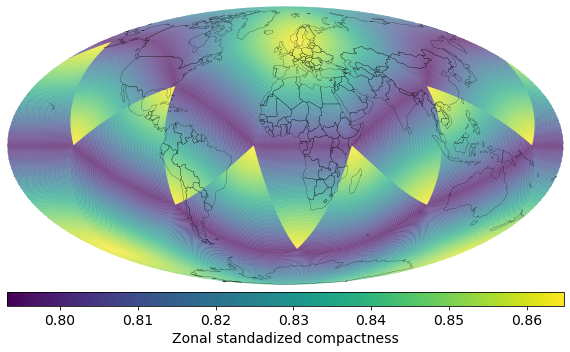

In [48]:
fig, ax = plt.subplots(figsize=(10,5))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0.1)
grid.to_crs('proj=moll').plot(column='zsc', ax=ax, legend=True,cax=cax, legend_kwds={'label': "zonal standadized compactness",'orientation': "horizontal"})
world_countries.boundary.to_crs('proj=moll').plot(color=None, edgecolor='black',linewidth = 0.2,ax=ax)
ax.axis('off')
ax.margins(0)
cb_ax = fig.axes[1] 
cb_ax.tick_params(labelsize=14)
cb_ax.set_xlabel(xlabel= "Zonal standadized compactness",fontsize=14)
ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
plt.tight_layout()
plt.savefig(r'd:\UTCloud\DGGS\results\area_statistics\Fuller4D_compactness_map.png', bbox_inches="tight",dpi=300)

In [41]:
grid.to_file(r'd:\UTCloud\DGGS\grids\grids.gpkg', layer='DGGRID_FULLER_4D_clean', driver='GPKG')